In [1]:
%matplotlib notebook
import longview as lv

In [2]:
cli = lv.WatchClient()

<IPython.core.display.Javascript object>


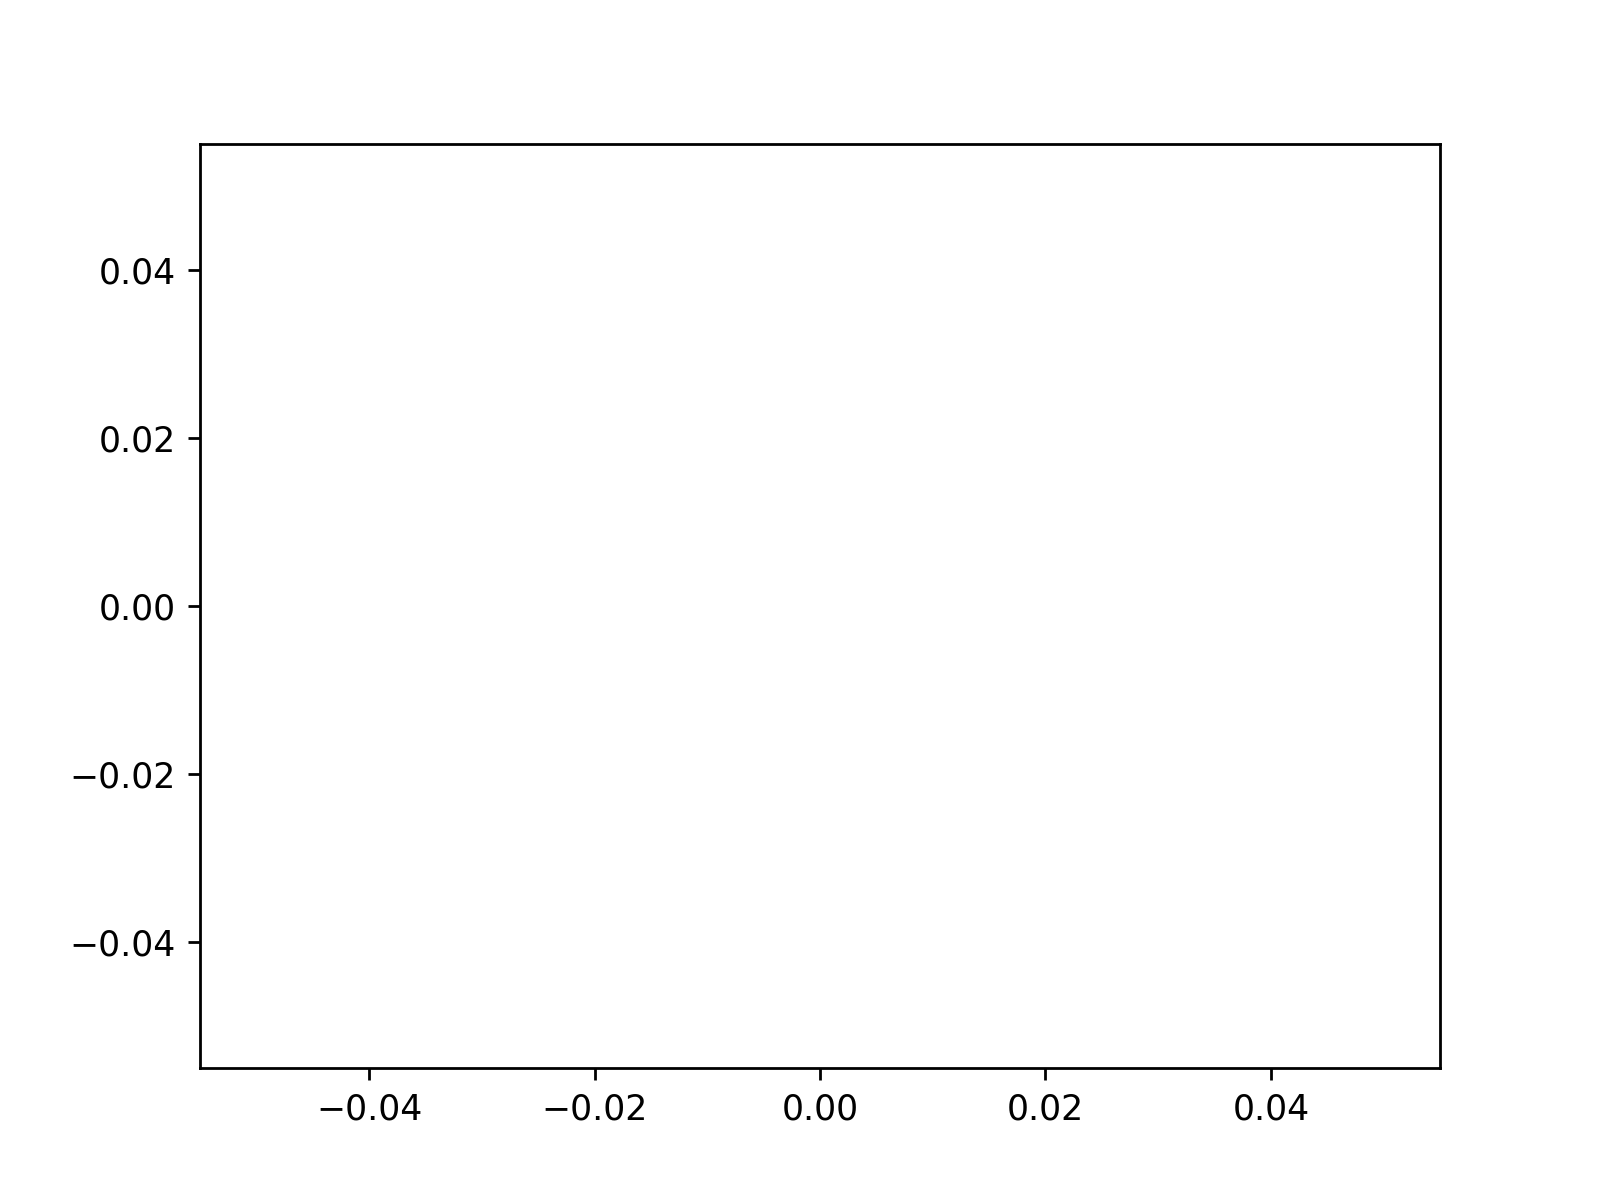

In [3]:
s1 = cli.create_stream("batch", 'lambda d:d.l')
r1 = lv.ScatterPlotRenderer()
r1.show(s1)